# Contextualização 
Meu professor coletou dados ao do acelerômetro/giroscópio do celular dele ao subir um elevador de um prédio da faculdade. A ideia era analisar os dados com os passos à seguir:

1. Read the file below in Python

````
https://raw.githubusercontent.com/pjasimoes/PIPythonData/main/Elevador_predio45_PS.csv
````


2. Find the time resolution (cadence) of the dataset

3. Plot the data (explore! which column has useful data?)

4. Obtain the speed (and estimate the uncertainty) of the elevator during its movement - from the data!

5. Obtain the distance (and estimate the uncertainty) travelled by the elevator - from the data!

6. Make a plot showing the final results (publication quality)

In [42]:
from scipy import integrate
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mlp

In [7]:
url = "https://raw.githubusercontent.com/pjasimoes/PIPythonData/main/Elevador_predio45_PS.csv"
data = pd.read_csv(url,sep=",") # use sep="," for coma separation. 

data #data frames 

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.017096,0.011964,0.090329,9.519546,9.519982
1,0.019601,-0.016750,0.114257,9.596116,9.596811
2,0.022106,-0.004786,0.056830,9.653543,9.653712
3,0.024611,-0.004786,0.087936,9.785150,9.785546
4,0.027117,-0.009571,0.075972,9.821041,9.821340
...,...,...,...,...,...
10655,26.712105,0.052642,0.075972,9.799506,9.799942
10656,26.714610,0.078963,0.042473,9.833006,9.833415
10657,26.717085,0.107677,0.023330,9.797113,9.797733
10658,26.719590,0.059821,0.028116,9.756435,9.756659


In [8]:
data.describe()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
count,10660.000000,10660.000000,10660.000000,10660.000000,10660.000000
mean,13.369564,0.034746,0.086153,9.808510,9.809057
std,7.710172,0.035244,0.029689,0.330847,0.330867
min,0.017096,-0.119641,-0.070289,8.619246,8.619409
25%,6.693273,0.011964,0.068794,9.746864,9.748392
50%,13.369574,0.035892,0.085543,9.809077,9.809331
75%,20.045847,0.057428,0.104686,9.864112,9.864871
max,26.722095,0.215653,0.245863,11.044372,11.044723


# Aceleração 

***

In [9]:
time = data['Time (s)']

## Aceleração x 
### No 🤨

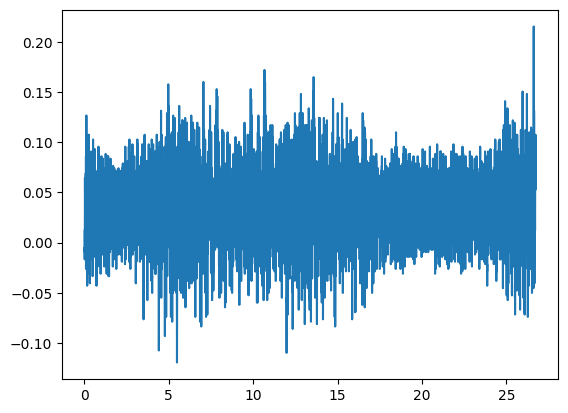

In [10]:
acceleration_x = data['Acceleration x (m/s^2)']
plt.plot(time, acceleration_x)

## Aceleração y
### No 😖

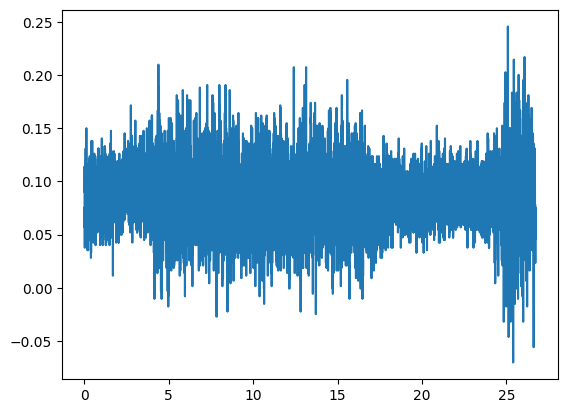

In [11]:
acceleration_y = data['Acceleration y (m/s^2)']
plt.plot(time, acceleration_y)

## Aceleração z 
### 🥳🤩🤓😝

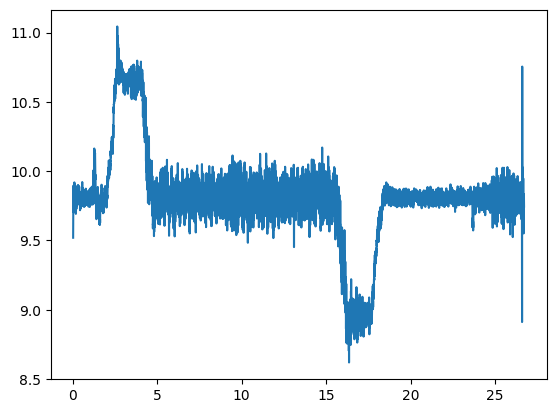

In [12]:
acceleration_z = data['Acceleration z (m/s^2)']
plt.plot(time, acceleration_z)

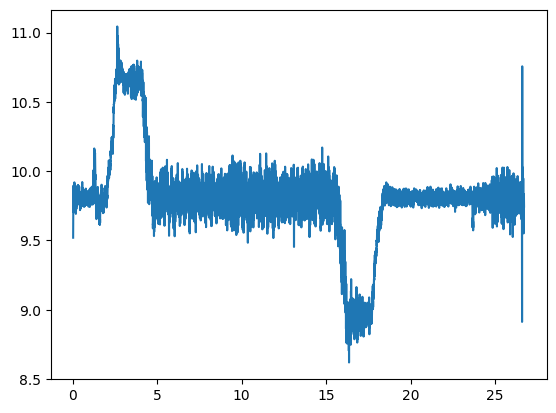

In [13]:
acceleration_ab_z = data['Absolute acceleration (m/s^2)']
plt.plot(time, acceleration_ab_z)

# Removendo o valor da gravidade

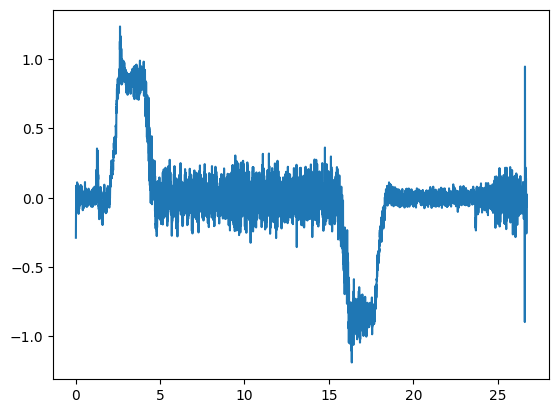

In [14]:
mean = acceleration_z.mean()
aceleracao_sem_gravidade = acceleration_z - mean

plt.plot(time, aceleracao_sem_gravidade)

Text(0, 0.5, 'Velocidade (m/s)')

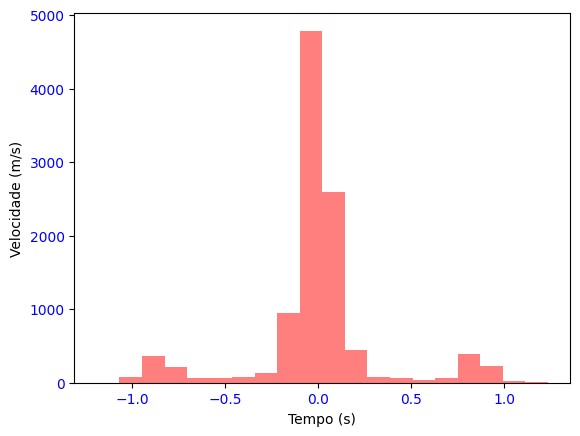

In [15]:
plt.hist(aceleracao_sem_gravidade, bins=20, alpha=0.5, color='r', label='Histograma')
plt.tick_params(axis='x', labelcolor='b')
plt.tick_params(axis='y', labelcolor='b')


plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')

## Comparação

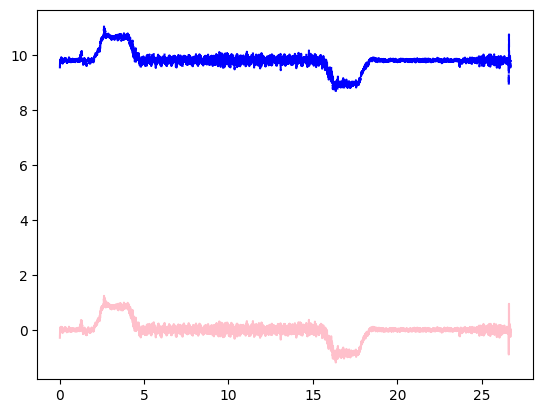

In [16]:
plt.plot(time, acceleration_z, linestyle='--', color='blue', label='Aceleração z')

plt.plot(time, aceleracao_sem_gravidade, linestyle='-', color='pink', label='Aceleração')

plt.show()

# Velocidade 
***
_dv = a * t_

Velocidade média: 0.8982290302158307


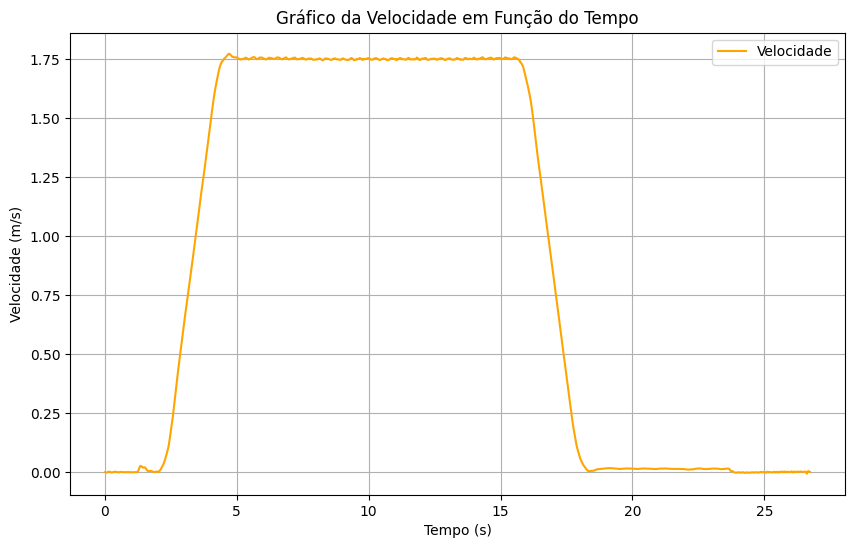

In [17]:
# Calculando a velocidade usando a integral cumulativa da aceleração

velocidade = integrate.cumulative_trapezoid(aceleracao_sem_gravidade, time, initial=0)

print("Velocidade média:", np.mean(velocidade))

plt.figure(figsize=(10, 6))

plt.plot(time, velocidade, linestyle='-', color='orange', label='Velocidade')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Gráfico da Velocidade em Função do Tempo')
plt.legend()
plt.grid(True)
plt.show()

# Distância 
***
_S = So * v * t_ 🍦

Distância média: 14.880357779611122


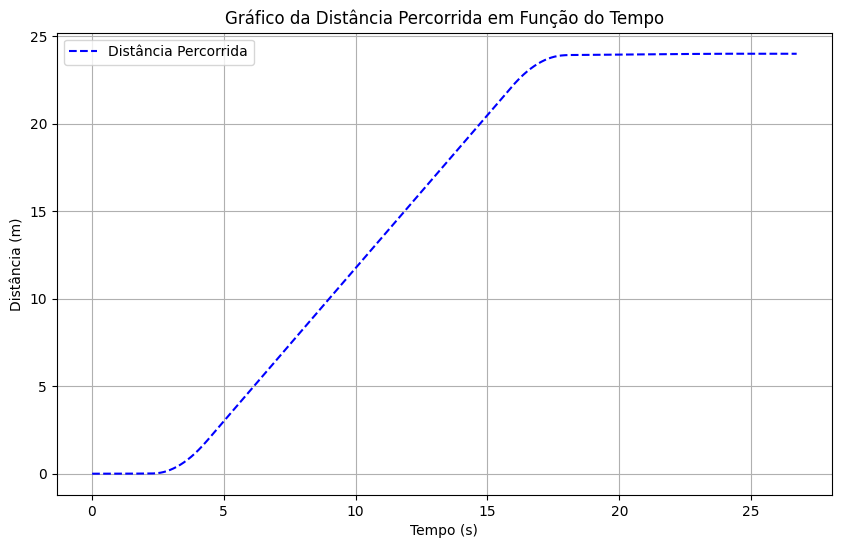

In [18]:
# Calculando o espaço usando a integral cumulativa da aceleração

distance = integrate.cumulative_trapezoid(velocidade, time, initial=0)

print("Distância média:", np.mean(distance))

# Plotando o gráfico da distância
plt.figure(figsize=(10, 6))
plt.plot(time, distance, linestyle='--', color='blue', label='Distância Percorrida')
plt.xlabel('Tempo (s)')
plt.ylabel('Distância (m)')
plt.title('Gráfico da Distância Percorrida em Função do Tempo')
plt.legend()
plt.grid(True)
plt.show()

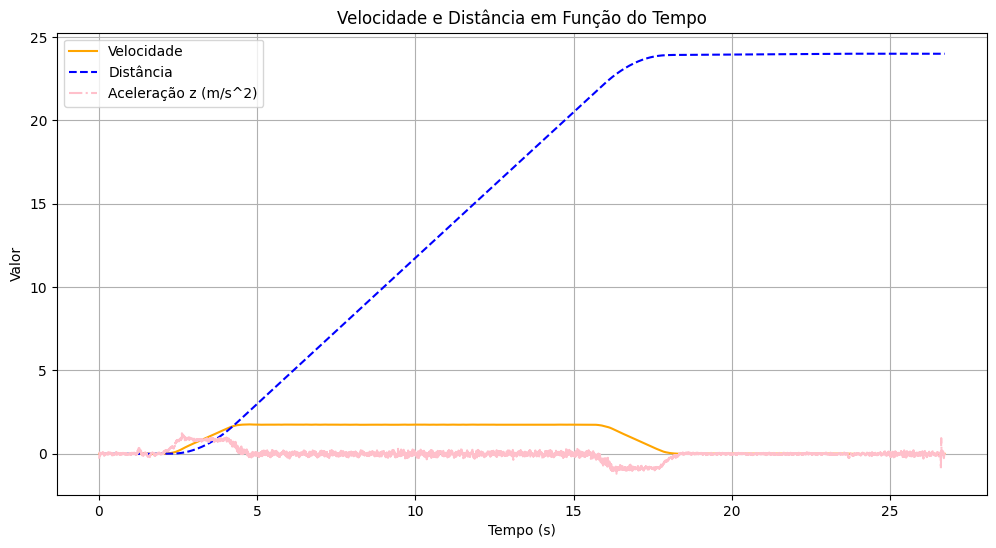

In [19]:
plt.figure(figsize=(12, 6)) 

# Plotar a linha da velocidade
plt.plot(time, velocidade, linestyle='-', color='orange', label='Velocidade')

# Plotar a linha da distância
plt.plot(time, distance, linestyle='--', color='blue', label='Distância')

# Plotar a linha da distância
plt.plot(time, aceleracao_sem_gravidade, linestyle='-.', color='pink', label='Aceleração z (m/s^2)')


plt.xlabel('Tempo (s)')
plt.ylabel('Valor')
plt.title('Velocidade e Distância em Função do Tempo')
plt.legend()
plt.grid(True)

# Incerteza
***
Desvio padrão

_Desvio padrão baixo: um desvio padrão baixo indica que a maioria dos valores do conjunto de dados está próxima da média. Os dados são menos dispersos e estão concentrados em torno da média; Desvio padrão alto: um desvio padrão alto sugere que os valores estão mais distantes da média e há uma maior dispersão dos dados_

In [20]:
desvio_padrao = np.std(aceleracao_sem_gravidade)

print("O desvio padrão dos dados é:", desvio_padrao)

O desvio padrão dos dados é: 0.3308312414511369


# Cortando os dados

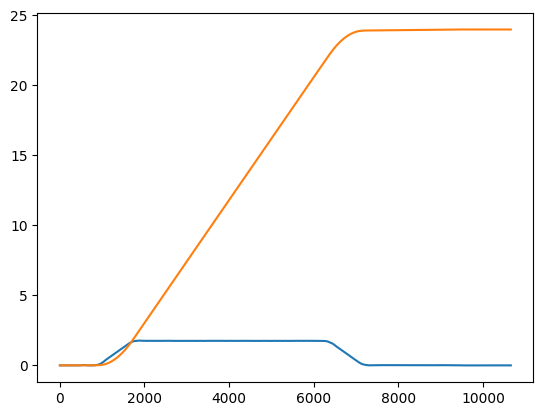

In [21]:
plt.plot(velocidade)
plt.plot(distance)

2.504563160993036e-16


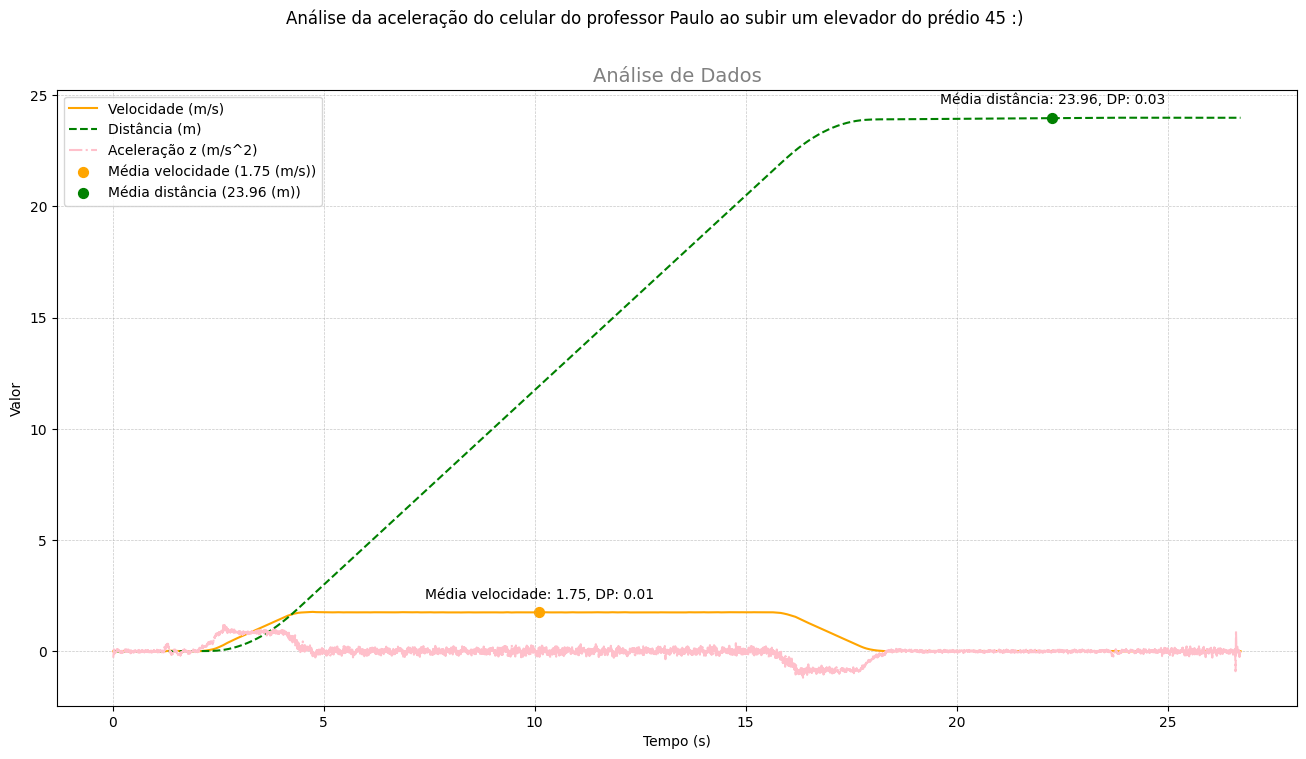

In [22]:
vel_cutted = []
vel_time_cutted = []
for idx, vel in enumerate(velocidade): 
    if (np.max(velocidade)-vel) < 0.1: 
        vel_cutted.append(vel)
        vel_time_cutted.append(time[idx])


dist_cutted = []
dist_time_cutted = []
for idx,dist in enumerate(distance): 
    if (np.max(distance)-dist) < 0.1: 
        dist_cutted.append(dist)
        dist_time_cutted.append(time[idx])

# media da velocidade x tempo
mean_vel = np.mean(vel_cutted)
mean_vel_time = np.mean(vel_time_cutted)

# media da distancia x tempo
mean_dis = np.mean(dist_cutted)
mean_dist_time = np.mean(dist_time_cutted)

# media aceleracao 
mean_ac = np.mean(aceleracao_sem_gravidade)
mean_time = np.mean(time)

plt.figure(figsize=(16, 8)) 

plt.suptitle('Análise da aceleração do celular do professor Paulo ao subir um elevador do prédio 45 :) ', fontsize=12)
plt.title('Análise de Dados', fontsize=14, color='gray')

# Plotar a linha da velocidade
plt.plot(time, velocidade, linestyle='-', color='orange', label='Velocidade (m/s)')

# Plotar a linha da distância
plt.plot(time, distance, linestyle='--', color='green', label='Distância (m)')

# Plotar a linha da distância
plt.plot(time, aceleracao_sem_gravidade, linestyle='-.', color='pink', label='Aceleração z (m/s^2)')


dp_vel =  np.std(vel_cutted)  

dp_dist =  np.std(dist_cutted)  

dp_ac =  np.std(aceleracao_sem_gravidade)       


plt.scatter(mean_vel_time, mean_vel, color='orange', label=f'Média velocidade ({mean_vel:.2f} (m/s))', s=50)
plt.scatter(mean_dist_time, mean_dis, color='green', label=f'Média distância ({mean_dis:.2f} (m))', s=50)


plt.text(mean_vel_time, mean_vel+0.5, f'Média velocidade: {mean_vel:.2f}, DP: {dp_vel:.2f}', fontsize=10, ha='center', va='bottom', color='black')
plt.text(mean_dist_time, mean_dis+0.5, f'Média distância: {mean_dis:.2f}, DP: {dp_dist:.2f}', fontsize=10, ha='center', va='bottom', color='black')


plt.xlabel('Tempo (s)')
plt.ylabel('Valor')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

print(mean_ac)


             

In [23]:
aceleracao_normalizada = (aceleracao_sem_gravidade - np.min(aceleracao_sem_gravidade)) / (np.max(aceleracao_sem_gravidade) - np.min(aceleracao_sem_gravidade))
valocidade_normalizada = (velocidade - np.min(velocidade)) / (np.max(velocidade) - np.min(velocidade))
distancia_normalizda = (distance - np.min(distance)) / (np.max(distance) - np.min(distance))

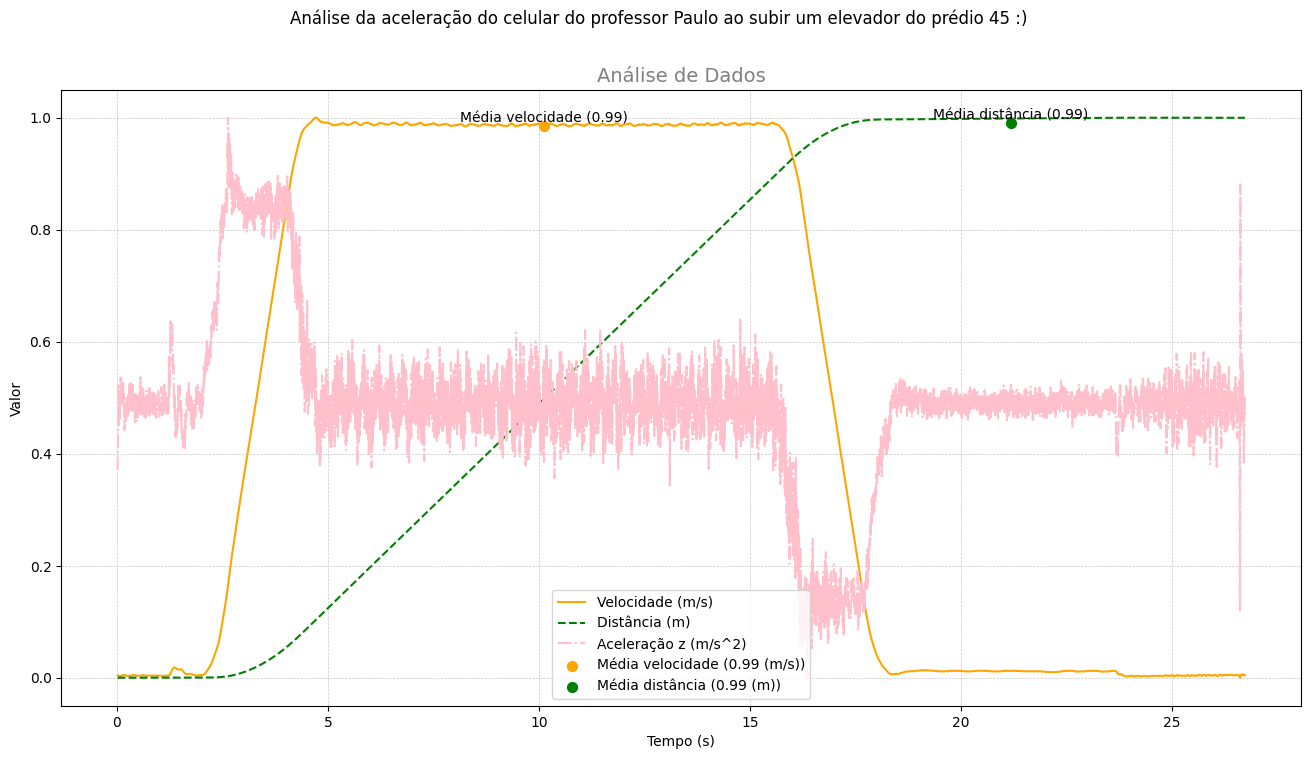

In [24]:
vel_cutted = []
vel_time_cutted = []
for idx, vel in enumerate(valocidade_normalizada): 
    if (np.max(valocidade_normalizada)-vel) < 0.1: 
        vel_cutted.append(vel)
        vel_time_cutted.append(time[idx])


dist_cutted = []
dist_time_cutted = []
for idx,dist in enumerate(distancia_normalizda): 
    if (np.max(distancia_normalizda)-dist) < 0.1: 
        dist_cutted.append(dist)
        dist_time_cutted.append(time[idx])

# media da velocidade x tempo
mean_vel = np.mean(vel_cutted)
mean_vel_time = np.mean(vel_time_cutted)

# media da distancia x tempo
mean_dis = np.mean(dist_cutted)
mean_dist_time = np.mean(dist_time_cutted)

# media aceleracao 
mean_ac = np.mean(aceleracao_normalizada)
mean_time = np.mean(time)


plt.figure(figsize=(16, 8)) 

plt.suptitle('Análise da aceleração do celular do professor Paulo ao subir um elevador do prédio 45 :) ', fontsize=12)
plt.title('Análise de Dados', fontsize=14, color='gray')

# Plotar a linha da velocidade
plt.plot(time, valocidade_normalizada, linestyle='-', color='orange', label='Velocidade (m/s)')

# Plotar a linha da distância
plt.plot(time, distancia_normalizda, linestyle='--', color='green', label='Distância (m)')

# Plotar a linha da distância
plt.plot(time, aceleracao_normalizada, linestyle='-.', color='pink', label='Aceleração z (m/s^2)')


plt.scatter(mean_vel_time, mean_vel, color='orange', label=f'Média velocidade ({mean_vel:.2f} (m/s))', s=50)
plt.scatter(mean_dist_time, mean_dis, color='green', label=f'Média distância ({mean_dis:.2f} (m))', s=50)

plt.text(mean_vel_time, mean_vel, f'Média velocidade ({mean_vel:.2f})', fontsize=10, ha='center', va='bottom', color='black')
plt.text(mean_dist_time, mean_dis, f'Média distância ({mean_dis:.2f})', fontsize=10, ha='center', va='bottom', color='black')

plt.xlabel('Tempo (s)')
plt.ylabel('Valor')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

In [47]:
dp_vel =  np.std(vel_cutted)  

dp_dist =  np.std(dist_cutted)  

dp_ac =  np.std(aceleracao_sem_gravidade)    


velocidade_cutted = velocidade[2000:6000]
v_mean = np.mean(velocidade_cutted)

print(v_mean)


space_cutted = distance[8000:10000]
dist_mean = np.mean(space_cutted)

print(dist_mean)
print(dp_dist)



1.7510102818236142
23.973381587207943
0.01967715361588976


# Resolução do professor

Text(6, 1.51, 'v= 1.75 $\\pm$ 0.0027 m/s')

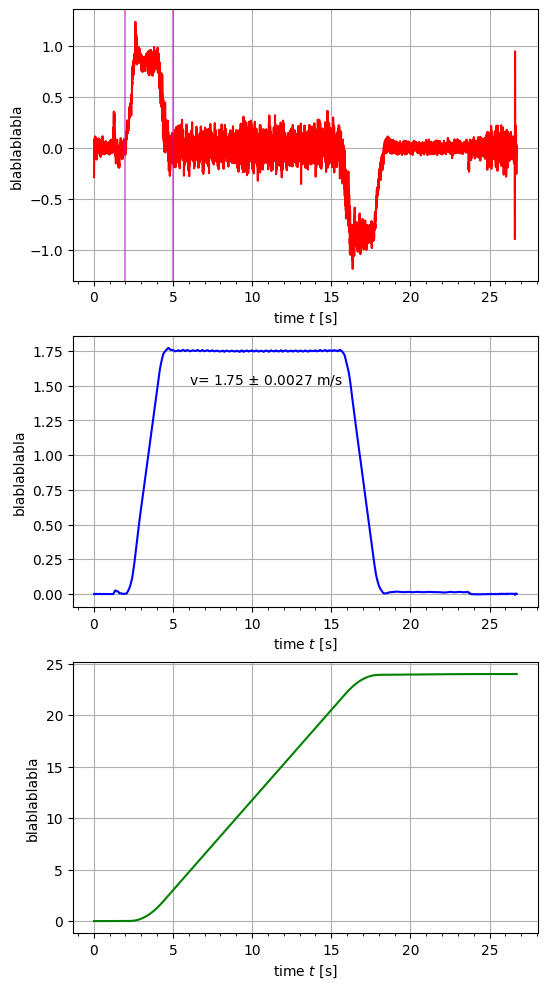

In [46]:
# subplots, linha, coluna e tamanho da figura 
fig,ax = plt.subplots(3,1,figsize=(6,12))
ax = ax.flatten()

ax[0].plot(time,aceleracao_sem_gravidade, color='red')
ax[1].plot(time,velocidade, color='blue')
ax[2].plot(time,distance, color='green')

for i in ax: 
	i.grid()
	i.set_xlabel(r'time $t$ [s]')
	i.xaxis.set_major_locator(mlp.MultipleLocator(5))
	i.xaxis.set_minor_locator(mlp.MultipleLocator(1))
	
ax[0].set_ylabel('blablablabla')
ax[1].set_ylabel('blablablabla')
ax[2].set_ylabel('blablablabla')


### Linhas marcadoras 
ax[0].axvline(2, color='m', alpha = 0.5)
ax[0].axvline(5, color='m', alpha = 0.5)


vm = velocidade[2000:6000].mean()
vs = velocidade[2000:6000].std()


sm = distance[8000].mean()
ss = distance[8000].std()

label1 = 'v={:5.2f} $\pm$ {:5.2} m/s'.format(vm,vs)
ax[1].annotate(label1,(6,1.51), color='k')
